# Numismatic Distribution in Imperial Roman Africa Shown Through Social Network Analysis

## Abstract

Roman Africa is a large and diverse region that enjoyed quite high productivity and stability, especially in the first two centuries CE. Despite the great tradition of archaeological research on material remains, little attention has been paid to numismatic records. The purpose of this study is to apply SNA methods for the first time in numismatics to investigate the presence of interesting similarities in the distribution of coin types across the four Roman provinces of Africa and to understand the integration and hierarchy of settlements over time. The study, conducted on 32,292 coins found in hoards at 50 African sites between 23 BC and 275 CE, confirms trends already known to scholars. However, it also brought to light that the economy was not very integrated and hierarchical, but rather quite distributed in its centrality and with steady hubs over time, which allows for further research.

What follows is the Network Analysis workflow.

## Data Analysis

### Importing

In [6]:
import pandas as pd
from collections import Counter

data_frame = pd.read_csv('isaw-papers-13-data.csv')
data_frame

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,50966,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,270,270,270.0,NaN,NaN,Rome
50966,50967,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.09,270,270,270.0,NaN,NaN,Rome
50967,50968,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.57,270,275,272.5,NaN,NaN,Tripoli
50968,50969,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,260,268,264.0,NaN,NaN,Rome


### Exploring and Cleaning: an iterative process

To some extent, I already know what type of data can be found in the dataset and what I want to focus my attention on. For this reason, before analyzing any further, I can exclude some columns and type of data from the dataset, so that I can work on a restricted and on point set.

For example, I will check the Region, the findspot and the denomination to see if there are any empty/NAN/unknown spots and then retain only **Region=Africa**, **Findspot=hoard** and **exclude** any denomination of **imitation coins**. Moreover, the timespan the I want to consider is **23 BCE-275 CE**.

In [13]:
Counter(data_frame['Region'])

Counter({'Africa': 35559, 'Gaul': 13587, 'Spain': 1207, 'Britain': 617})

In [14]:
Counter(data_frame['Type'])

Counter({'hoard': 49759, 'sitefind': 1211})

What I can immediately do is retrieve only the data that has as **Region=Africa** and **findspot=hoard**.

In [15]:
df_africa = data_frame[(data_frame['Region'] == 'Africa') & (data_frame['Type'] == 'hoard')]
df_africa

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50955,50956,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50956,50957,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50957,50958,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50958,50959,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy


For more clarity, I can delete all the columns that will not be useful for my research.

In [16]:
df_africa = df_africa.drop(['Region','Type', 'Weight', 'Year_min', 'Year_max', 'Circulation', 'Terminal_date'], axis=1)
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


Checking Denominations, I notice that there are “imitation antoninianus” that I need to exclude.

In [17]:
Counter(df_africa['Denomination'])

Counter({'sestertius': 8045,
         'dupondius': 1,
         'denarius': 4603,
         'aureus': 38,
         'as': 4,
         'dupondius/as': 1,
         'antoninianus': 19680,
         'imitation antoninianus': 2012})

In [18]:
df_africa = df_africa[df_africa['Denomination'] != 'imitation antoninianus']
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


For sure, I can also exclude some coins minted before or after the time span of interest.

In [40]:
df_africa = df_africa[(df_africa['Mint_Year'] >= -23) & (df_africa['Mint_Year'] <= 275)]
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
32287,50956,Banasa,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
32288,50957,Banasa,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
32289,50958,Banasa,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
32290,50959,Banasa,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


In [41]:
df_africa.info() # Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32292 entries, 0 to 32291
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Catalogue     32292 non-null  int64  
 1   Findspot      32292 non-null  object 
 2   Province      32292 non-null  object 
 3   Denomination  32292 non-null  object 
 4   Mint_Year     32292 non-null  float64
 5   Mint          32292 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


Each column has the correct type, no need for fixes.

In [21]:
df_africa.count() # Returns the number of non-null values in each DataFrame: rows should be 32372

Catalogue       32292
Findspot        32292
Province        32292
Denomination    32292
Mint_Year       32292
Mint            32292
dtype: int64

In [23]:
df_africa.to_csv('refined_dataset.csv', index=False)

Since the detail of the single archaeological excavation in a Findspot is not of my interest, I proceed to clean the data with the OpenRefine software in order to unify similar Findposts.

The result is a new dataset, which I transform back into a dataframe, and which contains this number of Findspots:

In [42]:
df_africa = pd.read_csv('cleaned_dataset.csv', encoding='utf-8 ')

### Split data

Now it is time to spit data into 3 historical periods: 
1. 23 BCE- 96 CE
2. 97-192 CE
3. 193-275 CE

In [4]:
df_africa1 = df_africa[df_africa['Mint_Year'] < 97]
df_africa2 = df_africa[(df_africa['Mint_Year'] > 96) & (df_africa['Mint_Year'] < 193)]
df_africa3 = df_africa[df_africa['Mint_Year'] > 192]

In order to prepare tables that will be needed to callculate the BR coefficient, I develop the necessary functions.

In [5]:
def new_csv(data_frame, file_name):
    '''
    drop csv file
    '''
    return data_frame.to_csv(file_name, index=False)

In [6]:
def den_per_prov_count(data_frame):
    '''
    how many coins of each denomination per findspot, return new df
    '''
    find = data_frame['Findspot'].unique()
    den = data_frame['Denomination'].unique()
    new_d = {'Site': find.tolist()}
    for d in den.tolist():
        new_d[d] = 0
    new_df = pd.DataFrame(data=new_d)
    for f in find:
        for idn in data_frame.index:
            if data_frame['Findspot'][idn] == f:
                denomination = data_frame['Denomination'][idn]
                idx = new_df.index[new_df['Site'] == f].values[0]
                new_df.at[idx, denomination] = new_df.at[idx, denomination] +1
    return new_df

In [7]:
def remove_few_coins(df):
    '''
    remove site with less than 10 coins
    '''
    data_frame = den_per_prov_count(df)
    s = data_frame.sum(axis=1, numeric_only=True)
    for ind in data_frame.index:
        if s[ind] < 10:
            data_frame.drop(labels=ind, axis=0, inplace=True)
    return data_frame

In [29]:
df_africa1 = remove_few_coins(df_africa1)
df_africa2 = remove_few_coins(df_africa2)
df_africa3 = remove_few_coins(df_africa3)

In [290]:
# drop new csv files
new_csv(df_africa1, 'df_africa1.csv')
new_csv(df_africa2, 'df_africa2.csv')
new_csv(df_africa3, 'df_africa3.csv')

### BR coefficient and Mini-Max Model

I run the BR.r script on each of the three tables.

I need to define a model that decides a threshold under which the similarity between two findspots can be cosidered as too weak. Under the threshold, the network doesn't retain its unity. This threshold is necessary to transform the BR output matrix into a binary one: 1 equal or above threshold, 0 under threshold.

In [2]:
def remove_isolates(data_frame):
    '''
    check the presence of isolates and remove from graph
    '''
    G = nx.from_pandas_adjacency(data_frame)
    G.remove_edges_from(nx.selfloop_edges(G))

    iso = list(nx.isolates(G))
    if len(iso) > 0:
        for n in iso:
            data_frame.drop(n, axis=1, inplace=True)
            data_frame.drop(n, axis=0, inplace=True)
        return data_frame

In [3]:
def to_binary_matrix(threshold, df):
    '''
    change values to 1 or 0 based on threshold number
    '''
    df.mask(df < threshold, other=0, inplace=True)
    df.mask(df >= threshold, other=1, inplace=True)
    return df

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def min_max_model(file_name):
    '''
    find threshold for each matrix and return binary matrix
    '''
    # read the csv into a dataframe
    input_data = pd.read_csv(file_name, index_col=0)
    # immediately check if there are isolated nodes in the network: means they have similarity 0 with all others and we need to remove them
    remove_isolates(input_data)
    
    # define starting threshold value as 200 (max BR similarity coefficient) to have most of the nodes separated
    threshold = 200
    # create a copy of dataframe to not overwrite
    df_copy = input_data.copy()
    # first transformation into binary dataframe to check connectivity
    to_binary_matrix(threshold, df_copy)
    binary_G = nx.from_pandas_adjacency(df_copy)
    binary_G.remove_edges_from(nx.selfloop_edges(binary_G))  # remove selfloops because unnecessary
    connection = nx.is_connected(binary_G)
    
    # lower threshold value until there are no more separated components in the network
    while (connection == False):
        threshold -= 1
        df_copy = input_data.copy()
        to_binary_matrix(threshold, df_copy)
        binary_G = nx.from_pandas_adjacency(df_copy)
        binary_G.remove_edges_from(nx.selfloop_edges(binary_G))
        connection = nx.is_connected(binary_G)
    else:
        return df_copy

## The Networks

Now I binarize each matrix using the threshold of each one and visualize the networks:

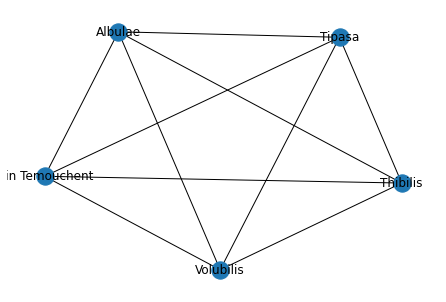

In [7]:
matrix_1 = min_max_model('df_africa1_out.csv')
G_1 = nx.from_pandas_adjacency(matrix_1)
G_1.remove_edges_from(nx.selfloop_edges(G_1))
nx.draw(G_1, with_labels='True')

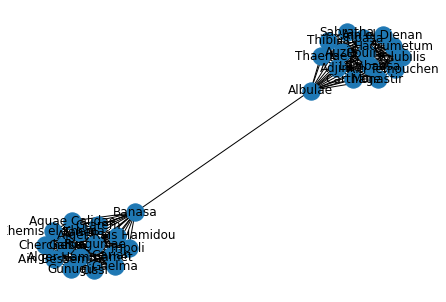

In [8]:
matrix_2 = min_max_model('df_africa2_out.csv')
G_2 = nx.from_pandas_adjacency(matrix_2)
G_2.remove_edges_from(nx.selfloop_edges(G_2))
nx.draw(G_2, with_labels='True')

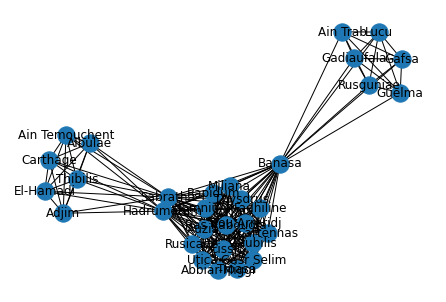

In [9]:
matrix_3 = min_max_model('df_africa3_out.csv')
G_3 = nx.from_pandas_adjacency(matrix_3)
G_3.remove_edges_from(nx.selfloop_edges(G_3))
nx.draw(G_3, with_labels='True')

By default, the layout of the nodes and edges is automatically determined by the Fruchterman-Reingold force-directed algorithm (called “spring layout” in NetworkX), which conducts a pseudo-physics simulation of the movements of the nodes, assuming that each edge is a spring with a ﬁxed equilibrium distance. This heuristic algorithm tends to bring groups of well-connected nodes closer to each other, making the result of visualization more meaningful and aesthetically more pleasing.

Now I will costumize the networks based on the Province of each findspot (color), and the composition of the hoard (width).

In [14]:
# colors
color_dict = {
    'Proconsularis': '#8D38E1', #purple
    'Numidia': '#E1E138', #yellow
    'Mauretania Caesarea': '#8DE138', #green
    'Mauretania Tingitana': '#E13838', #red
    'Tripolitania': '#8D38E1'
}

def color_map(G, starting_colors, dataframe):
    '''
    create a list of colors for the nodes, based on Province
    '''
    color_list = []
    node_list = list(G.nodes)
    for node in node_list:
        idx = dataframe.index[dataframe['Findspot']==node].tolist()[0]
        province = dataframe['Province'].iloc[idx]
        color = starting_colors[province]
        color_list.append(color)
    return color_list

In [15]:
color_map_1 = color_map(G_1, color_dict, df_africa)
color_map_2 = color_map(G_2, color_dict, df_africa)
color_map_3 = color_map(G_3, color_dict, df_africa)

In [16]:
# width
width_dict = {
    'sestertius': 50,
    'denarius': 200,
    'antoninianus': 600
}


def whidth_map(G, shape_dict, file_name):
    '''
    create a list of shapes for the nodes, based on the most present type of coin in Site
    '''
    width_list = []
    input_data = pd.read_csv(file_name, index_col=0)
    coin_types = input_data.idxmax(axis=1)

    node_list = list(G.nodes)
    for node in node_list:
        for index, value in coin_types.items():
            if node == index:
                width = width_dict[value]
                width_list.append(width)
    return width_list

In [17]:
color_list = []
for v in color_dict.values():
    color_list.append(v)

prov_list = []
for k in color_dict.keys():
    prov_list.append(k)

In [18]:
shape_map_1 = whidth_map(G_1, width_dict, 'df_africa1.csv')
shape_map_2 = whidth_map(G_2, width_dict, 'df_africa2.csv')
shape_map_3 = whidth_map(G_3, width_dict, 'df_africa3.csv')

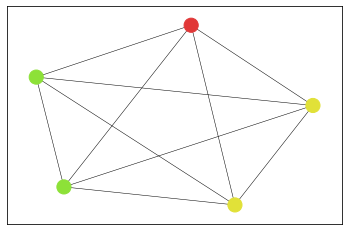

In [21]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

nx.draw_networkx(G_1, node_color=color_map_1, node_size=shape_map_1, width=0.5, with_labels=False)
plt.savefig("period1.png")

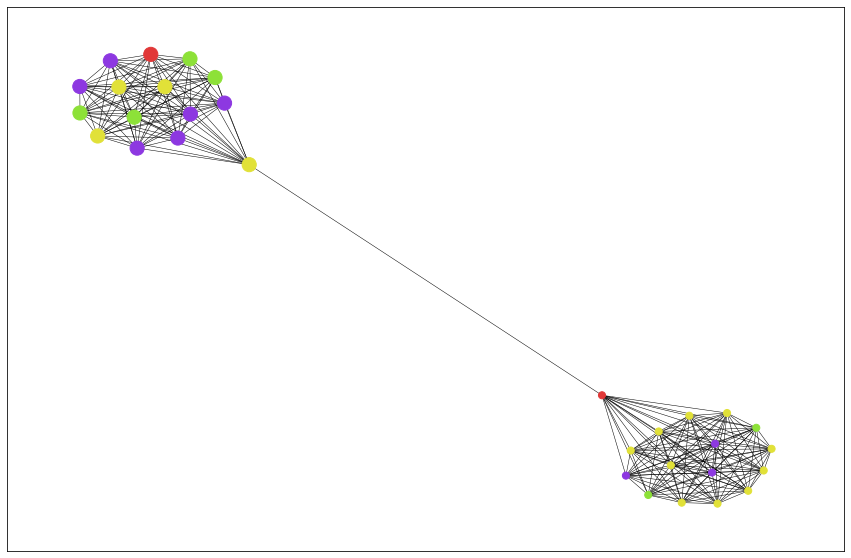

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))

nx.draw_networkx(G_2, node_color=color_map_2, node_size=shape_map_2, width=0.5, with_labels=False)
plt.savefig("period2.png")

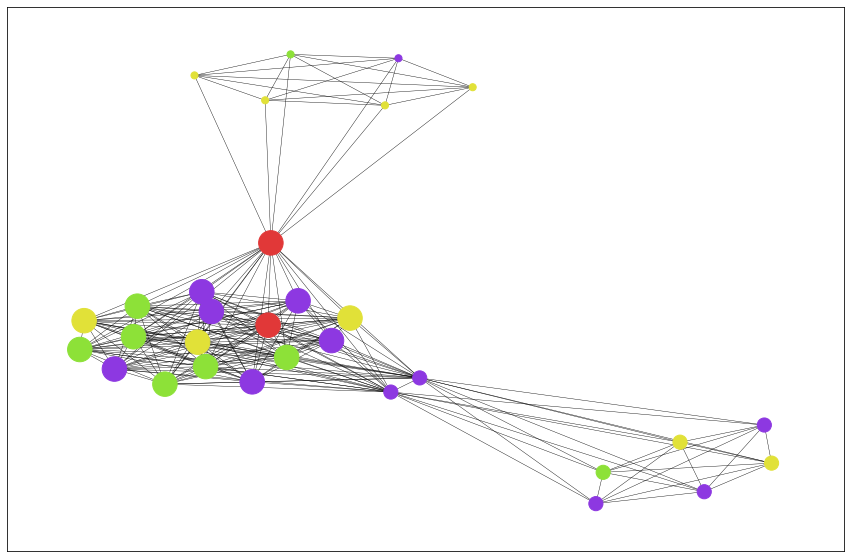

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))

nx.draw_networkx(G_3, node_color=color_map_3, node_size=shape_map_3, width=0.4, with_labels=False)
plt.savefig("period3.png")

### The Measures

#### Network Density

The simplest measure of cohesion is density, i.e., the ratio between the number of ties in the network with respect to the total number of possible ties *n(n-1)/2*.

In [25]:
d_1 = nx.density(G_1)
d_2 = nx.density(G_2)
d_3 = nx.density(G_3)
print(f'The networks have density of {d_1}, {d_2} and {d_3}.')

The networks have density of 1.0, 0.4860215053763441 and 0.47096774193548385.


#### Network Size

**Diameter**

The diameter of a network is the length of the longest among all existing shortest paths between every pair of nodes in the network. The diameter of the network is useful e.g., to understand the connectedness of networks.

In [27]:
dm_1 = nx.diameter(G_1)
dm_2 = nx.diameter(G_2)
dm_3 = nx.diameter(G_3)
print(f'The networks have diameter of {dm_1}, {dm_2} and {dm_3}.')

The networks have diameter of 1, 3 and 3.


**Average Path Length**

Paths are walks (a sequence of nodes such that every consecutive pair of nodes in the sequence is connected by an edge) that do not intersect themselves.
A shortest path in a network, also sometimes called a geodesic path, is the shortest walk (hence minimal on the number of edges and thus self-avoiding) between a given pair of nodes.

In [28]:
p_1 = nx.average_shortest_path_length(G_1)
p_2 = nx.average_shortest_path_length(G_2)
p_3 = nx.average_shortest_path_length(G_3)
print(f'The networks have average shortest path length of {p_1}, {p_2} and {p_3}.')

The networks have average shortest path length of 1.0, 1.9655913978494624 and 1.6064516129032258.


#### Centrality Measures

**Degree Centrality**

One of the simplest centrality measure for a node in a network is just its degree. In an undirected network, the degree of a
node is the number of edges connected to it.

It can be very illuminating: for example, in a social network those individuals who have many followers might have more influence, more access to information, or more prestige than those who have fewer. 

In [29]:
dc_1 = nx.degree_centrality(G_1)
dc_2 = nx.degree_centrality(G_2)
dc_3 = nx.degree_centrality(G_3)
print(f'Network 1 have degree centrality of {dc_1}\n\nNetwork 2 have degree centrality of {dc_2}\n\n Network 3 have degree centrality of {dc_3}.')

Network 1 have degree centrality of {'Volubilis': 1.0, 'Ain Temouchent': 1.0, 'Albulae': 1.0, 'Thibilis': 1.0, 'Tipasa': 1.0}

Network 2 have degree centrality of {'Gafsa': 0.5, 'Rusguniae': 0.5, 'Monastir': 0.4666666666666667, 'Lambaesa': 0.4666666666666667, 'Guelma': 0.5, 'Volubilis': 0.4666666666666667, 'Banasa': 0.5333333333333333, 'Ain Temouchent': 0.4666666666666667, 'Ain Bessem': 0.5, 'Ain el Djenan': 0.4666666666666667, 'Albulae': 0.5, 'Alger-Hammamet': 0.5, 'Alger-Rais Hamidou': 0.5, 'Thibilis': 0.4666666666666667, 'Bouira': 0.4666666666666667, 'Cherchel': 0.5, 'Auzia': 0.4666666666666667, 'Cissi': 0.5, 'Grarem': 0.5, 'Aquae Calidae': 0.5, 'Khemis el Khema': 0.5, 'Gunugu': 0.5, 'Taher': 0.5, 'Tipasa': 0.4666666666666667, 'Garian': 0.5, 'Sabratha': 0.4666666666666667, 'Tripoli ': 0.5, 'Adjim': 0.4666666666666667, 'Carthage': 0.4666666666666667, 'Thaenae': 0.4666666666666667, 'Hadrumetum': 0.4666666666666667}

 Network 3 have degree centrality of {'Gafsa': 0.2, 'Guelma': 0.2, 'R

In [131]:
# mean value

import statistics

def mean_value(d):
    value_set = []
    for v in d.values():
        value_set.append(v)
    return statistics.mean(value_set)

print(mean_value(dc_1))
print(mean_value(dc_2))
print(mean_value(dc_3))

1.0
0.4860215053763441
0.47096774193548385


**Eigenvector Centrality**

In many circumstances a node’s importance in a network is increased by having connections to other nodes that are themselves important.

Eigenvector centrality is an extension of degree centrality that takes this factor into account. Instead of just awarding one point for every network neighbour a node has, eigenvector centrality awards a number of points proportional to the centrality
scores of the neighbours.

For example, you might have only one friend in the world, but if that friend is the president of the United States then you yourself may be an important person. Thus centrality is not only about how many people you know but also who you know.

In [47]:
ec_1 = nx.eigenvector_centrality_numpy(G_1)
ec_2 = nx.eigenvector_centrality_numpy(G_2)
ec_3 = nx.eigenvector_centrality_numpy(G_3)
print(f'Network 1 have eigenvector centrality of {ec_1}\n\nNetwork 2 have eigenvector centrality of {ec_2}\n\n Network 3 have eigenvector centrality of {ec_3}.')

Network 1 have eigenvector centrality of {'Volubilis': 0.447213595499958, 'Ain Temouchent': 0.4472135954999579, 'Albulae': 0.44721359549995787, 'Thibilis': 0.44721359549995787, 'Tipasa': 0.4472135954999579}

Network 2 have eigenvector centrality of {'Gafsa': 0.2493300581425379, 'Rusguniae': 0.2493300581425378, 'Monastir': 0.015575501086128698, 'Lambaesa': 0.015575501086128688, 'Guelma': 0.24933005814253786, 'Volubilis': 0.015575501086128672, 'Banasa': 0.25128366661580476, 'Ain Temouchent': 0.015575501086128807, 'Ain Bessem': 0.24933005814253784, 'Ain el Djenan': 0.015575501086128735, 'Albulae': 0.03127304293671361, 'Alger-Hammamet': 0.2493300581425379, 'Alger-Rais Hamidou': 0.24933005814253784, 'Thibilis': 0.015575501086128709, 'Bouira': 0.015575501086128709, 'Cherchel': 0.2493300581425379, 'Auzia': 0.015575501086128695, 'Cissi': 0.2493300581425379, 'Grarem': 0.2493300581425378, 'Aquae Calidae': 0.24933005814253786, 'Khemis el Khema': 0.24933005814253778, 'Gunugu': 0.24933005814253786,

In [126]:
# mean value

print(mean_value(ec_1))
print(mean_value(ec_2))
print(mean_value(ec_3))

0.4472135954999579
0.1367924063514964
0.1503527612683376


**Betweenness Centrality**

Betweenness centrality, also based on shortest paths, measures the extent to which a node lies on paths between other nodes. The assumption here is that paths lying on “trafficked” shortest paths have a more central role in the network, as gateways favoured by their closeness to (reach) the other nodes.

In [79]:
bc_1 = nx.betweenness_centrality(G_1)
bc_2 = nx.betweenness_centrality(G_2)
bc_3 = nx.betweenness_centrality(G_3)
print(f'Network 1 have betweenness centrality of {bc_1}\n\nNetwork 2 have betweenness centrality of {bc_2}\n\nNetwork 3 have betweenness centrality of {bc_3}.')

Network 1 have betweenness centrality of {'Volubilis': 0.0, 'Ain Temouchent': 0.0, 'Albulae': 0.0, 'Thibilis': 0.0, 'Tipasa': 0.0}

Network 2 have betweenness centrality of {'Gafsa': 0.0, 'Rusguniae': 0.0, 'Monastir': 0.0, 'Lambaesa': 0.0, 'Guelma': 0.0, 'Volubilis': 0.0, 'Banasa': 0.5172413793103449, 'Ain Temouchent': 0.0, 'Ain Bessem': 0.0, 'Ain el Djenan': 0.0, 'Albulae': 0.5149425287356322, 'Alger-Hammamet': 0.0, 'Alger-Rais Hamidou': 0.0, 'Thibilis': 0.0, 'Bouira': 0.0, 'Cherchel': 0.0, 'Auzia': 0.0, 'Cissi': 0.0, 'Grarem': 0.0, 'Aquae Calidae': 0.0, 'Khemis el Khema': 0.0, 'Gunugu': 0.0, 'Taher': 0.0, 'Tipasa': 0.0, 'Garian': 0.0, 'Sabratha': 0.0, 'Tripoli ': 0.0, 'Adjim': 0.0, 'Carthage': 0.0, 'Thaenae': 0.0, 'Hadrumetum': 0.0}

Network 3 have betweenness centrality of {'Gafsa': 0.0, 'Guelma': 0.0, 'Rusguniae': 0.0, 'Banasa': 0.3310344827586207, 'Ain Temouchent': 0.0, 'Hadrumetum': 0.1586206896551724, 'El-Hamadi': 0.0, 'Albulae': 0.0, 'Ain Trab': 0.0, 'Thibilis': 0.0, 'Cissi': 0

In [132]:
# mean value

print(mean_value(bc_1))
print(mean_value(bc_2))
print(mean_value(bc_3))

0.0
0.03329625509825732
0.020912124582869854
